In [8]:
import pytz 
import pandas as pd 
from datetime import datetime, timedelta
from datetime import time as datetime_time
from helpers.constants import LOCAL_STORAGE_FOLDER
from sklearn.preprocessing import MinMaxScaler

normalize = False 
filename = "sep14.csv"
# Clean and normalize es data. Normalize means to put it between 0 and 1
utc_tz = pytz.timezone("UTC")
eastern_tz = pytz.timezone("US/Eastern")
df = pd.read_csv(LOCAL_STORAGE_FOLDER / f"spy_data/{filename}")
day_of_data = (
    pd.to_datetime(df.iloc[0]["ts_recv"], unit="ns")
    .tz_localize(utc_tz)
    .tz_convert(eastern_tz)
)

market_open = datetime_time(9, 30)
market_open_full_datetime_ns = (
    datetime.combine(day_of_data.date(), market_open)
    .astimezone(pytz.timezone("US/Eastern"))
    .timestamp()
) * 1e9
market_close = datetime_time(16, 0)
market_close_full_datetime_ns = (
    datetime.combine(day_of_data.date(), market_close)
    .astimezone(pytz.timezone("US/Eastern"))
    .timestamp()
) * 1e9

df1 = df[
    (market_open_full_datetime_ns <= df["ts_recv"])
    & (df["ts_recv"] <= market_close_full_datetime_ns)
]
df2 = df1[df1["action"] == "T"]
columns_to_keep = ["ts_recv", "price"]
df3 = df2[columns_to_keep]
df3["ts_recv"] = pd.to_datetime(df3["ts_recv"], unit="ns")
high = df3["price"].quantile(0.99)
low = df3["price"].quantile(0.01)
df4 = df3[(df3["price"] < high) & (df3["price"] > low)]
if normalize:
    scaler = MinMaxScaler()
    df4["price"] = scaler.fit_transform(df4[["price"]])
df4["ts_recv"] = df4["ts_recv"].apply(
    lambda time: time.tz_localize(utc_tz).tz_convert(eastern_tz)
)


/var/folders/bq/3lxf2pcx7s9crrr7kqds7d_00000gn/T/ipykernel_20799/1151860720.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["ts_recv"] = pd.to_datetime(df3["ts_recv"], unit="ns")
/var/folders/bq/3lxf2pcx7s9crrr7kqds7d_00000gn/T/ipykernel_20799/1151860720.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["ts_recv"] = df4["ts_recv"].apply(


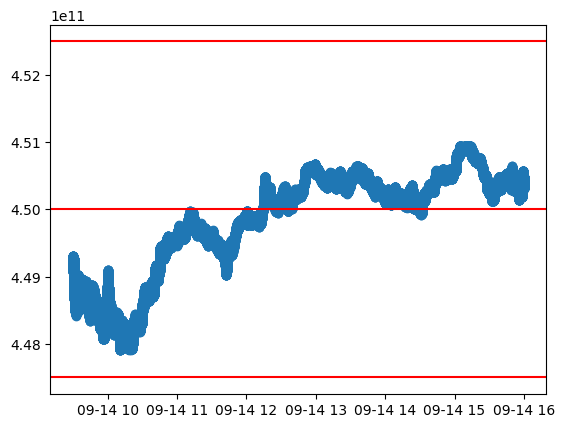

In [13]:

# looks like ES doesnt move between bands that often 
import matplotlib.pyplot as plt
plt.scatter(df4["ts_recv"], df4["price"])
plt.axhline(y = 447_500_000_000, color = 'r')
plt.axhline(y = 450_000_000_000, color = 'r')
plt.axhline(y = 452_500_000_000, color = 'r')
plt.show()

False